In [ ]:
import os
import tweepy as tw
import pandas as pd

In [ ]:
consumer_key= 'rUe0qQvk2Dg880y3Yyn9wTzRG' 
consumer_secret = 'K56LQCLtcLOx1qfI8WUdVsE7Ql5O9zRmNG70y7l2Jo96s9cFob'
access_token= '1082843311-aemaPn9wbce1o7xmmQlSBJPES1uJqAj0j0sW4H0'
access_token_secret= 'PQvzK80OruxaxqeLDYCBOjfR286tCfrPGoWfWvDCxpWJO'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Define the search term and the date_since date as variables
search_words = "#vaccines"
date_since = "2009-12-31"

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)
tweets


In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)

# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)
    

TweepError: ignored

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(5)

# Collect a list of tweets
[tweet.text for tweet in tweets]

['RT @LotusOak2: #Arizona lawmaker: All ingredients, side effects must be disclosed before any #vaccine\n\nhttps://t.co/rPVrUKjW6Y\n\nA state sen…',
 'A dramatic day as the debate over #vaccines continued - plus @mgmcampbell continues his tour of what he saw in… https://t.co/goBJsJ20p2',
 'RT @LotusOak2: #Arizona lawmaker: All ingredients, side effects must be disclosed before any #vaccine\n\nhttps://t.co/rPVrUKjW6Y\n\nA state sen…',
 'RT @LotusOak2: #Arizona lawmaker: All ingredients, side effects must be disclosed before any #vaccine\n\nhttps://t.co/rPVrUKjW6Y\n\nA state sen…',
 'RT @LotusOak2: The Normalization of Corruption - Big Pharma Takes "#Tobacco Tactics" to a New Level • Children\'s Health Defense\n\nhttps://t.…']

In [ ]:
new_search = search_words + " -filter:retweets"
new_search

'#vaccines -filter:retweets'

In [ ]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(5)

[tweet.text for tweet in tweets]

['A dramatic day as the debate over #vaccines continued - plus @mgmcampbell continues his tour of what he saw in… https://t.co/goBJsJ20p2',
 'Dr. Meryl Nass, MD, to #Maine Legislators: Diseases Persist Due to #Vaccine #Failure - Not Unvaccinated… https://t.co/wOZ0sk45Su',
 '(5/5) Laboratory findings showed inflammatory syndrome and elevated circulating immune complexes... “… https://t.co/Un1tMMuykq',
 '$INO Inovio is developing INO-4800 through Phase 1 in the U.S. with the support of an initial $9M grant from the Co… https://t.co/Uc5RM4iGHA',
 '(4/5)...Two-dimensional echocardiography findings were normal. Endomyocardial biopsy showed interstitial edema with… https://t.co/VOcmRlfMh9']

In [ ]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(5)

tweets_impact = [[tweet.user.screen_name, tweet.user.location,  tweet.id_str, tweet.text, tweet.retweet_count, tweet.favorite_count] for tweet in tweets]
tweets_impact 

[['MarkZinni',
  'Old Saybrook, CT',
  '1232115748736204805',
  'A dramatic day as the debate over #vaccines continued - plus @mgmcampbell continues his tour of what he saw in… https://t.co/goBJsJ20p2',
  0,
  0],
 ['LotusOak2',
  'NoVA, USA',
  '1232113600472453121',
  'Dr. Meryl Nass, MD, to #Maine Legislators: Diseases Persist Due to #Vaccine #Failure - Not Unvaccinated… https://t.co/wOZ0sk45Su',
  3,
  5],
 ['picphysicians',
  'Newport Beach, CA',
  '1232113006508756994',
  '(5/5) Laboratory findings showed inflammatory syndrome and elevated circulating immune complexes... “… https://t.co/Un1tMMuykq',
  0,
  2],
 ['Escells',
  'United States',
  '1232112443222040576',
  '$INO Inovio is developing INO-4800 through Phase 1 in the U.S. with the support of an initial $9M grant from the Co… https://t.co/Uc5RM4iGHA',
  0,
  0],
 ['picphysicians',
  'Newport Beach, CA',
  '1232112248493166592',
  '(4/5)...Two-dimensional echocardiography findings were normal. Endomyocardial biopsy showed 

In [ ]:
tweets_impact  = pd.DataFrame(data=tweets_impact, 
                    columns=['user', "location", "Id", "Text", "RT", "Fav" ])
tweets_impact 

,user,location,Id,Text,RT,Fav
0,MarkZinni,"Old Saybrook, CT",1232115748736204805,A dramatic day as the debate over #vaccines co...,0,0
1,LotusOak2,"NoVA, USA",1232113600472453121,"Dr. Meryl Nass, MD, to #Maine Legislators: Dis...",3,5
2,picphysicians,"Newport Beach, CA",1232113006508756994,(5/5) Laboratory findings showed inflammatory ...,0,2
3,Escells,United States,1232112443222040576,$INO Inovio is developing INO-4800 through Pha...,0,0
4,picphysicians,"Newport Beach, CA",1232112248493166592,(4/5)...Two-dimensional echocardiography findi...,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
new_search = "vaccines+autism -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2018-04-23').items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]


['@VeritasEver &amp; YOU think that, when, "the evidence is INADEQUATE to accept or reject acausal relationship between t… https://t.co/X9ktkJwIyp',
 '@ECepheide @TuckerGoodrich @drandyphung There exists weirdos who lie about ADHD and diet being either supportive of… https://t.co/7U9VIDF0Lc',
 '@jamelholley My son got autism when I was in healthcare. I was told not to listen to quacks as I was educated &amp; the… https://t.co/oKmdeyMKTz',
 'My Eye! I’m Not Supposed To Get Measles In It! #blogger https://t.co/88kBRlXhfh #autism',
 '3/ The committee concluded "that the evidence is inadequate to accept or reject a causal relationship between thime… https://t.co/9TfDmJM4vP']

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['VeritasEver amp YOU think that when the evidence is INADEQUATE to accept or reject acausal relationship between t',
 'ECepheide TuckerGoodrich drandyphung There exists weirdos who lie about ADHD and diet being either supportive of',
 'jamelholley My son got autism when I was in healthcare I was told not to listen to quacks as I was educated amp the',
 'My Eye Im Not Supposed To Get Measles In It blogger autism',
 '3 The committee concluded that the evidence is inadequate to accept or reject a causal relationship between thime']

In [ ]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()

['veritasever',
 'amp',
 'you',
 'think',
 'that',
 'when',
 'the',
 'evidence',
 'is',
 'inadequate',
 'to',
 'accept',
 'or',
 'reject',
 'acausal',
 'relationship',
 'between',
 't']

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

In [ ]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)


[('vaccines', 527),
 ('autism', 504),
 ('the', 461),
 ('a', 270),
 ('to', 265),
 ('is', 250),
 ('cause', 249),
 ('and', 244),
 ('that', 229),
 ('of', 217),
 ('i', 209),
 ('you', 184),
 ('in', 147),
 ('are', 134),
 ('not', 128)]

In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,vaccines,527
1,autism,504
2,the,461
3,a,270
4,to,265


In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,vaccines,527
1,autism,504
2,the,461
3,a,270
4,to,265


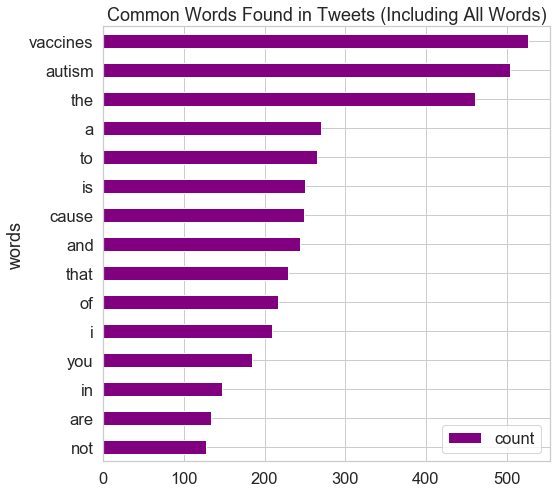

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]


["you're",
 "isn't",
 'after',
 'shan',
 "you've",
 'an',
 'each',
 's',
 'their',
 'theirs']

In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

collection_words = ['vaccines', 'vaccine', 'work', 'vaccination']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]
usernames = [[tweet.user.screen_name] for tweet in tweet

tweets_nsw_nc[0]

SyntaxError: invalid syntax (<ipython-input-24-b44ccaceaec2>, line 10)

In [ ]:

usernames = list([tweet.user.screen_name for tweet in tweets])
usernames

[[tweet.user.screen_name] for tweet in tweets]


In [ ]:
all_words_nsw = list(itertools.chain(*tweets_nsw_nc))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

In [ ]:
len(counts_nsw)

In [ ]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

In [ ]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

In [ ]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

In [ ]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

In [ ]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

In [ ]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.to_csv('C:\\Users\\conra\Documents\\IST 718\\sentiment.csv', sep = ',')
sentiment_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Vaccines")
plt.show()

In [ ]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Vaccines")
plt.show()

In [ ]:
search_term = "#VaccinesWork -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-09-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]


In [ ]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.to_csv('C:\\Users\\conra\Documents\\IST 718\\Vaccines_Work_sentiment.csv', sep = ',')

wild_sent_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the #VaccinesWork")
plt.show()